# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

# For all the columns and rows printed properly
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [2]:
#Reading csv file using read_csv
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the number of rows and columns in the dataframe
df.shape

(730, 16)

In [4]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check the summary for the numeric columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
#Checking total columns in the dataframe
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 2: Data Quality Check 

#### Checking Missing Values

In [7]:
# Checking missing values in Dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Insight: Looking at data dictionary,we can drop these columns:
- "instant" is records index which is not significant for further analysis
- "dteday" is date,since we have already column "yr" and "mnth" for date
- "causal" and "registered" both columns contain counts of bike booked by causal and registered users,whereas we have already  c   "cnt" column which contain counts of total rental bike including both causal and registered


In [8]:
#Saving data into new Dataframe "bike" for further analysis
bike=df.drop(['instant','dteday','casual','registered'],axis=1)
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Checking Data Types of Columns

In [9]:
# Check the column-wise info of the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
#Changing some of the columns from int to category to increase the understanding and readability
cat_list=['season','yr','mnth','holiday','weekday','workingday','weathersit']
bike[cat_list]=bike[cat_list].astype('category')


In [11]:
bike[['temp','atemp','hum','windspeed','cnt']]=bike[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


##### Insight: Looking at data dictionary,we can map categories with respective values
- season: season (1:spring,2:summer,3:fall,4:winter)
- mnth: mnth (1 tp 12) which is denoting jan to dec
- wethersit: wethersit( 1: clear_fewclouds_partlycloudy, 2: mist_cloudy , 3: lightsnow_lightrain, 4: heavyrain_ice_pallets)
- weekday: day of week

In [12]:
# Mapped categories with respective values
bike.season=bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike.mnth=bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weathersit=bike.weathersit.map({1:'clear_fewclouds_partlycloudy,',2:'mist_cloudy',3:'lightsnow_lightrain',4:'heavyrain_ice_pallets'})
bike.weekday=bike.weekday.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})


In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,"clear_fewclouds_partlycloudy,",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,"clear_fewclouds_partlycloudy,",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,"clear_fewclouds_partlycloudy,",9.305237,11.46350,43.6957,12.522300,1600


# Step 3: Visualising the Data

#### Univariate  Analysis

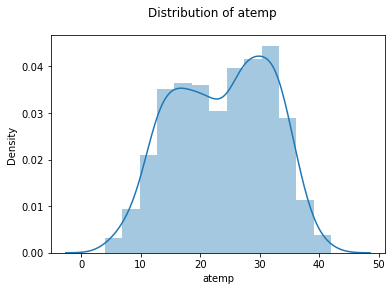

In [14]:
plt.suptitle("Distribution of atemp")
sns.distplot(bike['atemp'])
plt.show()

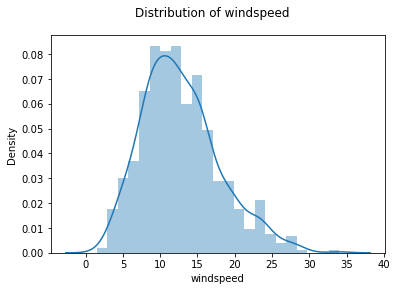

In [15]:
plt.suptitle("Distribution of windspeed")
sns.distplot(bike['windspeed'])
plt.show()

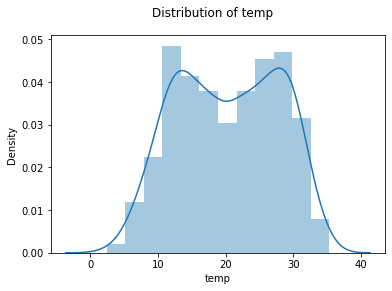

In [16]:
plt.suptitle("Distribution of temp")
sns.distplot(bike['temp'])
plt.show()

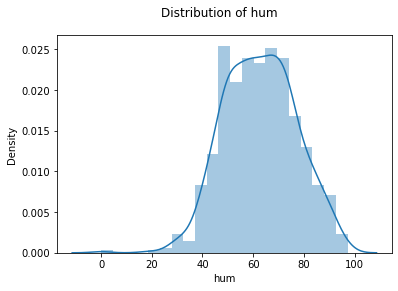

In [17]:
plt.suptitle("Distribution of hum")
sns.distplot(bike['hum'])
plt.show()

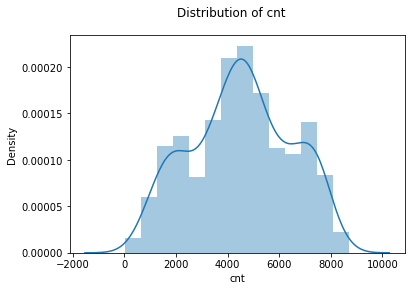

In [18]:
plt.suptitle("Distribution of cnt")
sns.distplot(bike['cnt'])
plt.show()

#### Bivariate Analysis



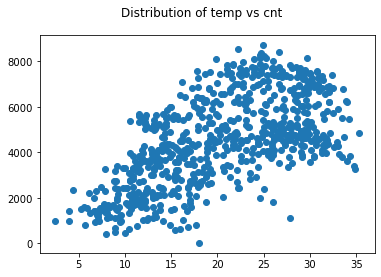

In [19]:
plt.scatter('temp','cnt',data=bike)
plt.suptitle("Distribution of temp vs cnt")
plt.show()


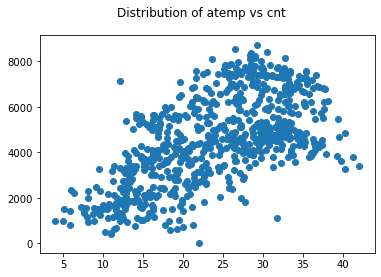

In [20]:
plt.scatter('atemp','cnt',data=bike)
plt.suptitle("Distribution of atemp vs cnt")
plt.show()

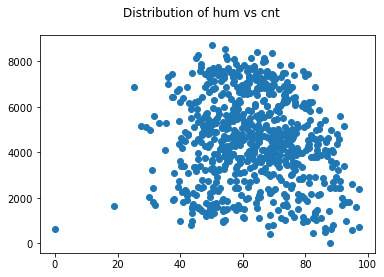

In [21]:
plt.scatter('hum','cnt',data=bike)
plt.suptitle("Distribution of hum vs cnt")
plt.show()

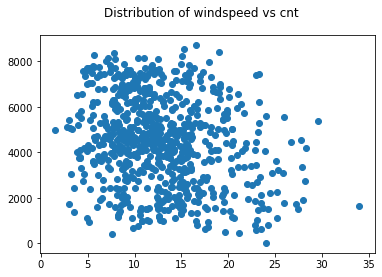

In [22]:
plt.scatter('windspeed','cnt',data=bike)
plt.suptitle("Distribution of windspeed vs cnt")
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

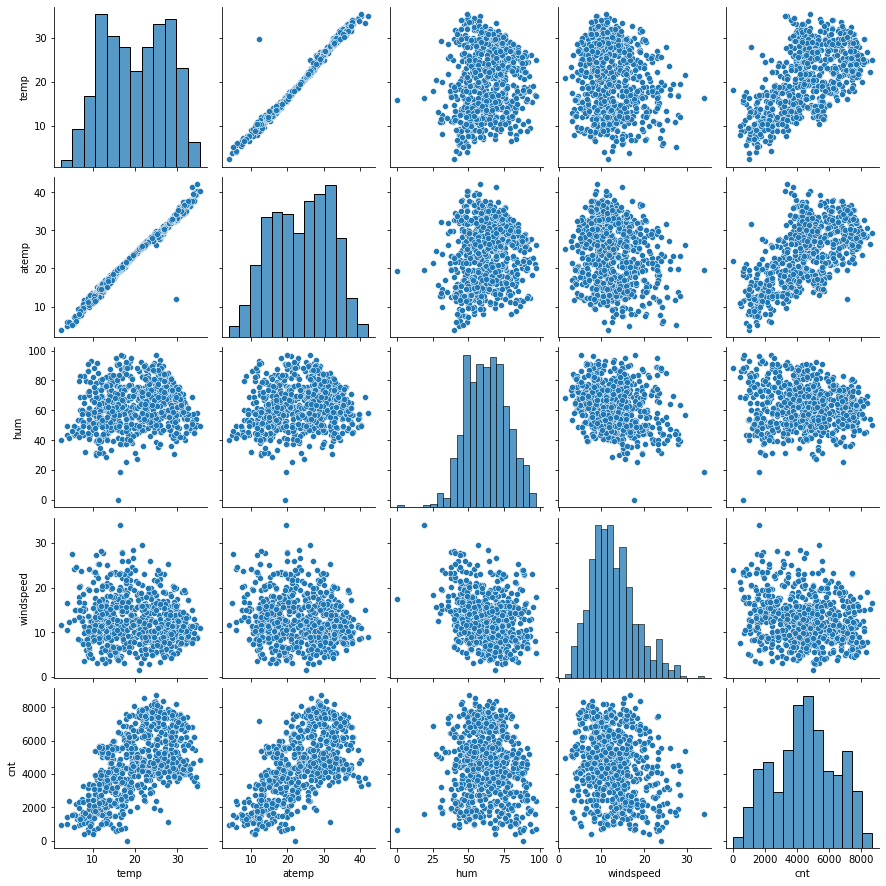

In [23]:
# Pairplot for continuous variables
sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

##### Insight: We can see there is linear relationship between 'temp','atemp','cnt'.

In [24]:
cor=bike[['temp','atemp','hum','windspeed','cnt']].corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False


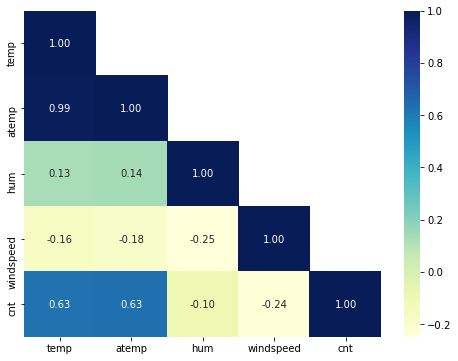

In [25]:
# Heatmap to see correlation between continuous variables
plt.figure(figsize=[8,6])
sns.heatmap(cor,mask=mask, cmap="YlGnBu", annot = True,fmt='.2f')
plt.show()

##### Insight: 
- There is positive correlation between "cnt" and "temp"(0.63).
- There is negative correlation between "cnt" and "hum"(-0.10) ,"cnt" and "windspeed"(-0.24).

It is observed that "atemp" and "temp" are highly correlated to each other so one can be removed to avoid multicollinearity. 

In [26]:
bike.drop('atemp',axis=1,inplace=True)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

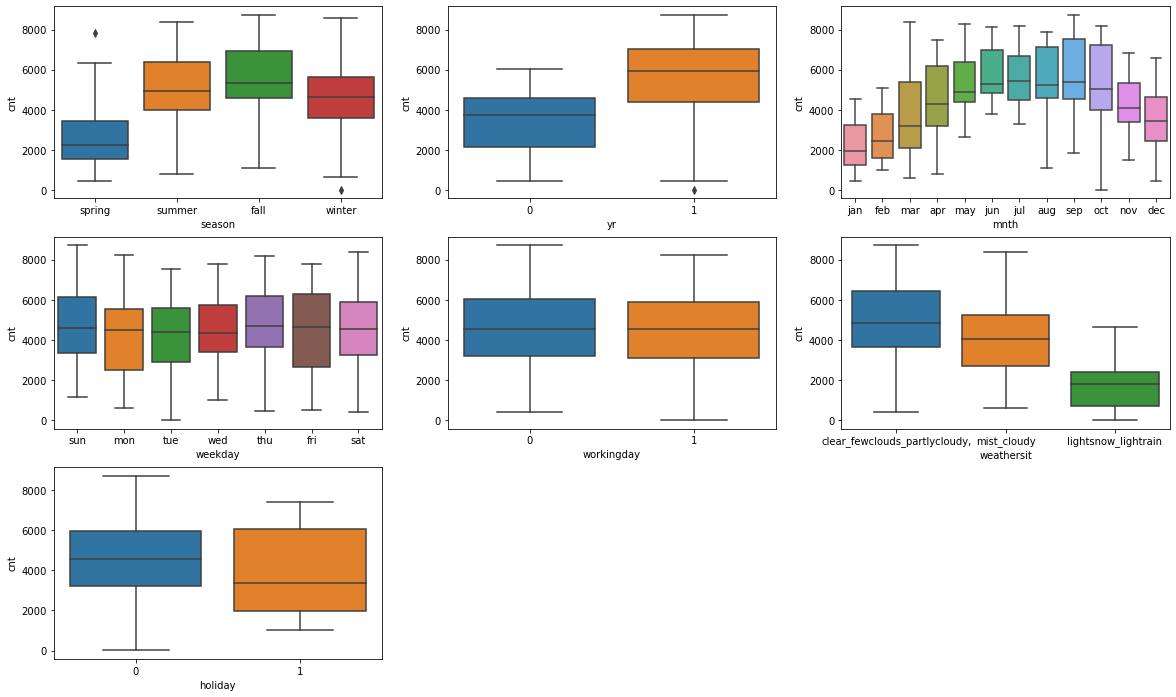

In [27]:
# Boxplot for categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data =bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data =bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data =bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data =bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike)


plt.show()

##### Insight:
- season: cnt demand of bike is lowest in spring season 
- yr: cnt demand of bikes are high in 2019(1) as compare to 2018(0)
- mnth: cnt demand of bikes are highest in may to september month and lowest in month of january
- weekday: cnt demand of bikes are almost same in all the days
- workingday: cnt demand of bikes on workingday and non workingday have no significant change
- weathersit: cnt demand of bikes are highest in clear,few clouds,partly cloudy weather condition and demand lowest in lights snow,light rain, thunderstorm, scattered clouds.
- holiday: cnt rental demand of bikes are low in holiday in comparison to non holiday

# Step 4: Data Preparation

### Dummy Variables

In [28]:
# Get the dummy variables for the feature 'season','weathersit','weekday','mnth' and store it in a new variable - 'seasons','weathersits','weekdays','mnths' dataframe 
# And drop the first column from'seasons','weathersits','weekdays','mnths' dataframe using 'drop_first = True'
seasons = pd.get_dummies(bike['season'],drop_first=True)
weathersits = pd.get_dummies(bike['weathersit'],drop_first=True)
weekdays = pd.get_dummies(bike['weekday'],drop_first=True)
mnths = pd.get_dummies(bike['mnth'],drop_first=True)


In [29]:
# see the head of dataframe.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.3 KB


In [30]:
# Concat 'seasons','weathersits','weekdays','mnths' dataframe to the bike dataframe
bike= pd.concat([bike, seasons,weathersits,weekdays,mnths], axis = 1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   season               730 non-null    category
 1   yr                   730 non-null    category
 2   mnth                 730 non-null    category
 3   holiday              730 non-null    category
 4   weekday              730 non-null    category
 5   workingday           730 non-null    category
 6   weathersit           730 non-null    category
 7   temp                 730 non-null    float64 
 8   hum                  730 non-null    float64 
 9   windspeed            730 non-null    float64 
 10  cnt                  730 non-null    int64   
 11  summer               730 non-null    uint8   
 12  fall                 730 non-null    uint8   
 13  winter               730 non-null    uint8   
 14  mist_cloudy          730 non-null    uint8   
 15  lightsnow_lightrain  73

In [31]:
# Drop 'seasons','weathersits','weekdays','mnths' dataframe as we have created the dummies for it
bike.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,lightsnow_lightrain,mon,tue,wed,thu,fri,sat,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   yr                   730 non-null    category
 1   holiday              730 non-null    category
 2   workingday           730 non-null    category
 3   temp                 730 non-null    float64 
 4   hum                  730 non-null    float64 
 5   windspeed            730 non-null    float64 
 6   cnt                  730 non-null    int64   
 7   summer               730 non-null    uint8   
 8   fall                 730 non-null    uint8   
 9   winter               730 non-null    uint8   
 10  mist_cloudy          730 non-null    uint8   
 11  lightsnow_lightrain  730 non-null    uint8   
 12  mon                  730 non-null    uint8   
 13  tue                  730 non-null    uint8   
 14  wed                  730 non-null    uint8   
 15  thu                  73

## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [33]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features 

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,lightsnow_lightrain,mon,tue,wed,thu,fri,sat,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
df_train.describe()

,temp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,lightsnow_lightrain,mon,tue,wed,thu,fri,sat,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [38]:
y_train=df_train.pop("cnt")
X_train=df_train

## Step 6: Building our model

We will be use **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)       # running RFE
rfe=rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('mist_cloudy', True, 1),
 ('lightsnow_lightrain', True, 1),
 ('mon', False, 8),
 ('tue', False, 9),
 ('wed', False, 7),
 ('thu', False, 5),
 ('fri', False, 6),
 ('sat', False, 14),
 ('feb', False, 10),
 ('mar', True, 1),
 ('apr', False, 2),
 ('may', True, 1),
 ('jun', False, 3),
 ('jul', False, 11),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 12),
 ('dec', False, 13)]

In [42]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'mist_cloudy', 'lightsnow_lightrain', 'mar', 'may', 'aug', 'sep',
       'oct'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'feb', 'apr',
       'jun', 'jul', 'nov', 'dec'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [44]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [45]:
import statsmodels.api as sm

# Adding a constant variable 
X_train_rfe1=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm1=sm.OLS(y_train,X_train_rfe1).fit()

# Check the parameters obtained
lm1.params

const                  0.237574
yr                     0.230385
holiday               -0.089060
temp                   0.484667
hum                   -0.178353
windspeed             -0.183595
summer                 0.115215
fall                   0.043588
winter                 0.153434
mist_cloudy           -0.055804
lightsnow_lightrain   -0.244542
mar                    0.033322
may                    0.030660
aug                    0.051139
sep                    0.120896
oct                    0.043662
dtype: float64

In [46]:
# Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.95e-189
Time:                        18:17:05   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2376    

In [47]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,fall,8.80
4,windspeed,3.80
5,summer,3.73
7,winter,3.13
8,mist_cloudy,2.15
0,yr,2.04
12,aug,1.85
11,may,1.68


#### Insights: From model 1, we can see that R-squared: 0.846, Adj. R-squared: 0.841, 'may' variable has very high p value 0.087, so we drop 'may' variable.

In [48]:
X_train_rfe = X_train_rfe.drop(['may'], axis=1)

#### Model 2

In [49]:
# Adding a constant variable 
X_train_rfe2=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm2=sm.OLS(y_train,X_train_rfe2).fit()



# Print a summary of the linear regression model obtained
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.02e-190
Time:                        18:17:06   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2321    

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
6,fall,8.53
4,windspeed,3.73
5,summer,3.51
7,winter,3.07
8,mist_cloudy,2.15
0,yr,2.03
11,aug,1.85
13,oct,1.64


#### Insights: After dropping the variable 'may' there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct. R-squared: 0.845 and Adj R-squared : 0.840. 'fall' variable is having pvalue 0.106>0.05. So we will drop 'fall' variable.

In [51]:
X_train_rfe = X_train_rfe.drop(['fall'], axis=1)


#### Model 3

In [52]:
# Adding a constant variable 
X_train_rfe3=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm3=sm.OLS(y_train,X_train_rfe3).fit()


# Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.26e-190
Time:                        18:17:07   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2324    

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,winter,2.34
7,mist_cloudy,2.14
0,yr,2.02
5,summer,1.83
10,aug,1.61
12,oct,1.61
11,sep,1.34


#### Insights: After dropping the variable 'fall' there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct.R-squared: 0.844 and Adj R-squared : 0.840. 'mar' variable is having pvalue 0.093 > 0.05. So we will drop 'mar' variable.


In [54]:
X_train_rfe = X_train_rfe.drop(['mar'], axis=1)

#### Model 4

In [55]:
# Adding a constant variable 
X_train_rfe4=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm4=sm.OLS(y_train,X_train_rfe4).fit()


# Print a summary of the linear regression model obtained
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.02e-191
Time:                        18:17:07   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2390    

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
7,mist_cloudy,2.13
0,yr,2.02
5,summer,1.83
11,oct,1.61
9,aug,1.60
10,sep,1.34


#### Insights: After dropping the variable 'mar' there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct. R-squared: 0.843 and Adj R-squared : 0.839. All the variables are having pvalue < 0.05. So we will look into VIF. VIF: 'hum' variable having highest VIF so we will drop this.

In [57]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Model 5

In [58]:
# Adding a constant variable 
X_train_rfe5=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm5=sm.OLS(y_train,X_train_rfe4).fit()


# Print a summary of the linear regression model obtained
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.02e-191
Time:                        18:17:07   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2390    

In [59]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.95
4,summer,1.82
10,oct,1.60
8,aug,1.59
6,mist_cloudy,1.49
9,sep,1.34
7,lightsnow_lightrain,1.09


#### Insights: After dropping the variable 'hum' there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct. R-squared: 0.843 and Adj R-squared : 0.839.All the variables are having pvalue < 0.05. All VIF is also < 5 except 'temp' variable but we have seen that 'temp' is highly correlated with target variable 'cnt', so this important variable and we can not drop it.So we will look into the higher p value variable and drop it to see the effect on R-squared. We will drop 'oct' variable which is having 0.026 p value

In [60]:
X_train_rfe = X_train_rfe.drop(['oct'], axis=1)

#### Model 6

In [61]:
# Adding a constant variable 
X_train_rfe6=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm6=sm.OLS(y_train,X_train_rfe6).fit()


# Print a summary of the linear regression model obtained
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.26e-187
Time:                        18:17:08   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1312    

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.81
8,aug,1.58
5,winter,1.49
6,mist_cloudy,1.48
9,sep,1.31
7,lightsnow_lightrain,1.08
1,holiday,1.04


#### Insights: After dropping the variable 'oct' there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct. R-squared: 0.834 and Adj R-squared : 0.831.All the variables are having pvalue < 0.05. All VIF is also < 5 except 'temp' variable but we have seen that 'temp' is highly correlated with target variable 'cnt', so this important variable and we can not drop it.So we will look into the higher p value variable and drop it to see the effect on R-squared. We will drop 'aug' variable which is having 0.001 p value

In [63]:
X_train_rfe.drop(['aug'],axis=1,inplace=True)


#### Model 7

In [64]:
# Adding a constant variable 
X_train_rfe7=sm.add_constant(X_train_rfe)

# Create a first fitted model
lm7=sm.OLS(y_train,X_train_rfe7).fit()


# Print a summary of the linear regression model obtained
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.37e-186
Time:                        18:17:09   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1264    

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,summer,1.56
6,mist_cloudy,1.48
5,winter,1.38
8,sep,1.20
7,lightsnow_lightrain,1.08
1,holiday,1.03


In [66]:
print(lm7.params)

const                  0.126436
yr                     0.232786
holiday               -0.099211
temp                   0.548046
windspeed             -0.153276
summer                 0.086848
winter                 0.130574
mist_cloudy           -0.079747
lightsnow_lightrain   -0.283837
sep                    0.101076
dtype: float64


#### Model 7 is our final model which have all significant variables and free from multicollinearity

### Final Model Interpretation

#### Hypothesis testing states that:

H0:B1=B2=...=Bn=0 

H1:  at least one  Bi!=0


#### F Statistics:
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 272.9
- Prob (F-statistic): 1.37e-186
- The F-Statistics value of 272.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

We can see that the equation of our best fitted line is:

$ cnt = 0.126 + 0.233  \times  yr - 0.099  \times  holiday + 0.548 \times temp - 0.153 \times windspeed + 0.086 \times summer + 0.131 \times winter - 0.079 \times mist_cloudy - 0.284 \times lightsnow + 0.101 \times sep $


## Step 7: Residual Analysis of the train data

### Linear Regression Assumptions:

- Linearity: There is a linear relationship between X and Y
- Normality: Error terms are normally distributed with mean zero (not X, Y)
- Homoscedasticity: Error terms have constant variance
- Independence: Error terms are independent of each other



#### Error terms are normally distributed with mean zero(not X, Y)
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
# Predict the train data
y_train_pred=lm7.predict(X_train_rfe7)

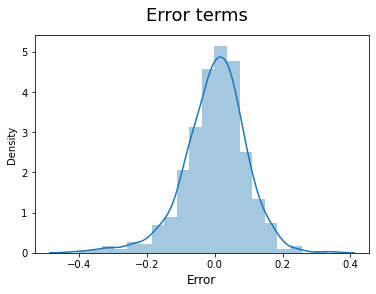

In [68]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
plt.xlabel("Error",fontsize=12)
plt.suptitle("Error terms",fontsize=18)
plt.show()

Insights: The distribution plot of error term shows the normal distribution with zero mean.

#### Error terms have constant variance (homoscedasticity)

Text(0, 0.5, 'Residual')

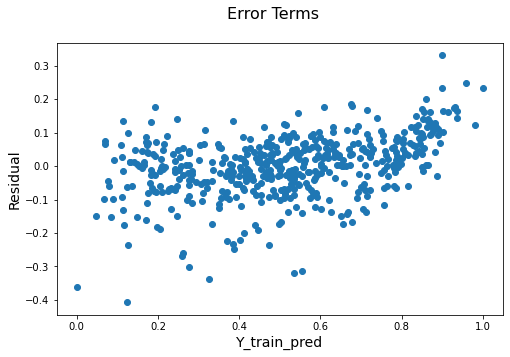

In [69]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,y_train-y_train_pred)
fig.suptitle('Error Terms', fontsize=16)              
plt.xlabel('Y_train_pred', fontsize=14)                      
plt.ylabel('Residual', fontsize=14)  



Insights: It seems like the corresponding residual plot is reasonably random. The error terms have constant variance (homoscedasticity)

#### Error terms are independent of each other

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,summer,1.56
6,mist_cloudy,1.48
5,winter,1.38
8,sep,1.20
7,lightsnow_lightrain,1.08
1,holiday,1.03


VIF value<5 mean there is no multicollinearity. All features are independent each other.

## Step 8: Making Predictions on Test Data

#### Applying the scaling on the test sets

In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,lightsnow_lightrain,mon,tue,wed,thu,fri,sat,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and Y_test

In [73]:
y_test=df_test.pop("cnt")
X_test=df_test

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new=X_train_rfe7.drop(['const'],axis=1)
X_test_new=X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new=sm.add_constant(X_test_new)

# Making predictions
y_pred=lm7.predict(X_test_new)

## Step 9: Model Evaluation

In [75]:
# R square value for test data
from sklearn.metrics import r2_score
r2_test=r2_score(y_test,y_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.794


 Adjusted R square value for test data
- Formula for Adjusted R^2

 R2adj.=1−(1−R2)∗(n−1)/(n−p−1)



In [76]:
final_params=list(lm7.params.index)
final_params.remove('const')

In [77]:
N= len(X_test)          # sample size
p =len(final_params)     # Number of independent variable
r2_test_adjusted = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adjusted R-Squared for Test dataset: ', round(r2_test_adjusted,3))



Adjusted R-Squared for Test dataset:  0.785


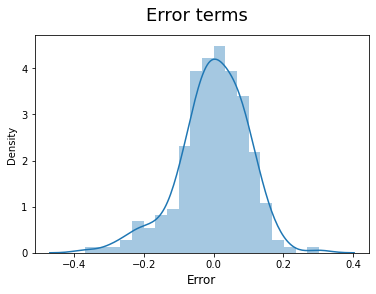

In [78]:
fig=plt.figure()
sns.distplot((y_test-y_pred),bins=20)
plt.xlabel("Error",fontsize=12)
plt.suptitle("Error terms",fontsize=18)
plt.show()

Insights: The distribution plot of error term shows the normal distribution with zero mean.

Text(0, 0.5, 'Residual')

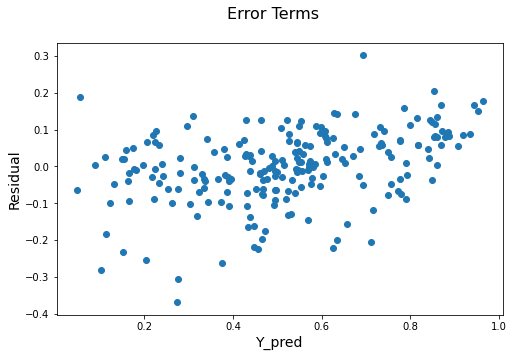

In [79]:
# Error terms test set
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,y_test-y_pred)
fig.suptitle('Error Terms', fontsize=16)              
plt.xlabel('Y_pred', fontsize=14)                      
plt.ylabel('Residual', fontsize=14)  

Insights: It seems like the corresponding residual plot is reasonably random. The error terms have constant variance (homoscedasticity)

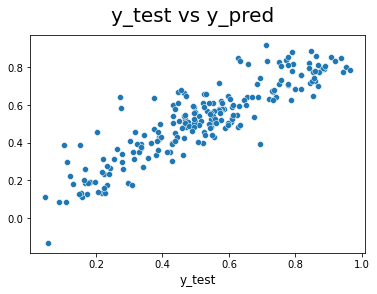

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig=plt.figure()
sns.scatterplot(y_test,y_pred)
plt.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=12)
plt.show()

In [81]:
print('Final model paameters: \n', lm7.params)

Final model paameters: 
 const                  0.126436
yr                     0.232786
holiday               -0.099211
temp                   0.548046
windspeed             -0.153276
summer                 0.086848
winter                 0.130574
mist_cloudy           -0.079747
lightsnow_lightrain   -0.283837
sep                    0.101076
dtype: float64


Insight: From lm7 model coefficient,we can see that none of coefficient is zero,mean all coefficients are significant and we can reject null hypothesis.

#### Conclusion:
The top 3 variables that are seen effecting and benefitting the Bike Rental count are as follows:

#### temp : 0.548, A coefficient value of ‘0.548’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.548 units.


#### lightsnow_lightrain : -0.2838, A coefficient value of ‘-0.2838’ indicated that a unit increase in lightsnow_lightrain variable decreases the bike hire numbers by 0.2838 units

#### yr : 0.232, A coefficient value of ‘0.232’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232 units. 